In [ ]:
# Importing all necessary libraries
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense,MaxPool2D
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from keras.models import load_model

import keras

from keras.models import Model
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Conv2D, MaxPooling2D

from keras.utils.np_utils import to_categorical
import pandas as pd
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
from keras.preprocessing.image import load_img
import glob
data=[]
labels=[]
bkl= glob.glob('/content/drive/MyDrive/train_test/train/bkl/*.jpg')
mel= glob.glob('/content/drive/MyDrive/train_test/train/mel/*.jpg')
nv= glob.glob('/content/drive/MyDrive/train_test/train/nv/*.jpg')

for i in bkl:
  image=load_img(i, target_size= (224,224)) 
  image=np.asarray(image)
  data.append(image)
  labels.append(0)


In [ ]:
for i in mel:
  image=load_img(i, target_size= (224,224)) 
  image=np.asarray(image)
  data.append(image)
  labels.append(1)
for i in nv:
  image=load_img(i, target_size= (224,224)) 
  image=np.asarray(image)
  data.append(image)
  labels.append(2)



In [ ]:


bkl1= glob.glob('/content/drive/MyDrive/train_test/test/bkl/*.jpg')
mel1= glob.glob('/content/drive/MyDrive/train_test/test/mel/*.jpg')
nv1= glob.glob('/content/drive/MyDrive/train_test/test/nv/*.jpg')

for i in bkl1:
  image=load_img(i, target_size= (224,224)) 
  image=np.asarray(image)
  data.append(image)
  labels.append(0)

In [ ]:
for i in mel1:
  image=load_img(i, target_size= (224,224)) 
  image=np.asarray(image)
  data.append(image)
  labels.append(1)
for i in nv1:
  image=load_img(i, target_size= (224,224)) 
  image=np.asarray(image)
  data.append(image)
  labels.append(2)

In [ ]:
df=pd.DataFrame({'data':data,'labels':labels})
df2 = df.sample(frac = 1)
data1=np.asarray(df2.iloc[:,0].tolist())
labels1=np.asarray(df2.iloc[:,1].tolist())

In [ ]:

#data = np.asarray(data)
#labels = np.asarray(labels)

In [ ]:
from keras.utils.np_utils import to_categorical
#y_test=data1
cat_labels = to_categorical(labels1, num_classes=3)
data1=data1/255
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data1, cat_labels, test_size=0.25, random_state=250)
x_train.shape


(3375, 224, 224, 3)

In [ ]:
y_test.shape

(1125, 3)

In [ ]:

from tensorflow.keras.applications import EfficientNetB0
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

inputs = layers.Input(shape=(224, 224, 3))
x = img_augmentation(inputs)
outputs = EfficientNetB0(include_top=True, weights=None, classes=3)(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size = 15
epochs =30

history = model.fit(
    x_train,y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test,y_test),
    verbose=2)

Epoch 1/30
225/225 - 48s - loss: 2.4110 - accuracy: 0.4480 - val_loss: 1.7303 - val_accuracy: 0.3636 - 48s/epoch - 211ms/step
Epoch 2/30
225/225 - 28s - loss: 1.1422 - accuracy: 0.5307 - val_loss: 1.1879 - val_accuracy: 0.3636 - 28s/epoch - 123ms/step
Epoch 3/30
225/225 - 28s - loss: 0.9935 - accuracy: 0.5742 - val_loss: 1.4213 - val_accuracy: 0.3716 - 28s/epoch - 123ms/step
Epoch 4/30
225/225 - 28s - loss: 0.9403 - accuracy: 0.6181 - val_loss: 4.6615 - val_accuracy: 0.4889 - 28s/epoch - 123ms/step
Epoch 5/30
225/225 - 28s - loss: 0.9513 - accuracy: 0.6041 - val_loss: 0.9629 - val_accuracy: 0.5733 - 28s/epoch - 123ms/step
Epoch 6/30
225/225 - 28s - loss: 0.8927 - accuracy: 0.6391 - val_loss: 12.5906 - val_accuracy: 0.4649 - 28s/epoch - 123ms/step
Epoch 7/30
225/225 - 28s - loss: 0.8489 - accuracy: 0.6427 - val_loss: 3.6500 - val_accuracy: 0.6489 - 28s/epoch - 123ms/step
Epoch 8/30
225/225 - 28s - loss: 0.8642 - accuracy: 0.6344 - val_loss: 0.7495 - val_accuracy: 0.6667 - 28s/epoch - 12

In [ ]:
model.save('model_3_class.h5')

model1=load_model('model_3_class.h5')

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath="/content/path/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
call_backs=[checkpoint]

In [ ]:
hist=model1.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test),verbose=2,callbacks=call_backs)

Epoch 1/30

Epoch 1: val_accuracy improved from -inf to 0.83556, saving model to /content/path/weights-improvement-01-0.84.hdf5
68/68 - 25s - loss: 0.3794 - accuracy: 0.8397 - val_loss: 0.3968 - val_accuracy: 0.8356 - 25s/epoch - 371ms/step
Epoch 2/30

Epoch 2: val_accuracy did not improve from 0.83556
68/68 - 24s - loss: 0.3654 - accuracy: 0.8519 - val_loss: 0.4655 - val_accuracy: 0.8231 - 24s/epoch - 356ms/step
Epoch 3/30

Epoch 3: val_accuracy did not improve from 0.83556
68/68 - 24s - loss: 0.3639 - accuracy: 0.8527 - val_loss: 0.4526 - val_accuracy: 0.8338 - 24s/epoch - 355ms/step
Epoch 4/30

Epoch 4: val_accuracy did not improve from 0.83556
68/68 - 24s - loss: 0.3501 - accuracy: 0.8569 - val_loss: 0.4665 - val_accuracy: 0.8169 - 24s/epoch - 354ms/step
Epoch 5/30

Epoch 5: val_accuracy did not improve from 0.83556
68/68 - 24s - loss: 0.3595 - accuracy: 0.8542 - val_loss: 0.5019 - val_accuracy: 0.8151 - 24s/epoch - 356ms/step
Epoch 6/30

Epoch 6: val_accuracy did not improve from 

In [ ]:

model1=load_model('84_3_class.h5')
score = model1.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

36/36 [==============================] - 13s 46ms/step - loss: 0.3499 - accuracy: 0.8587
Test accuracy: 0.8586666584014893


In [ ]:

y_pred=model1.predict(x_test)
y_pred

array([[8.69826555e-01, 1.25761896e-01, 4.41152742e-03],
       [2.98226660e-05, 9.96126473e-01, 3.84374755e-03],
       [2.90872883e-02, 9.59830225e-01, 1.10824844e-02],
       ...,
       [2.24972181e-02, 6.95107877e-01, 2.82394916e-01],
       [1.29532740e-01, 8.18003297e-01, 5.24639376e-02],
       [5.96509203e-02, 9.25490797e-01, 1.48583045e-02]], dtype=float32)

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

<Figure size 432x432 with 0 Axes>

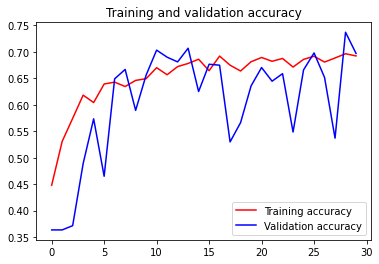

<Figure size 432x432 with 0 Axes>

In [ ]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure(figsize=(6,6))

<Figure size 432x432 with 0 Axes>

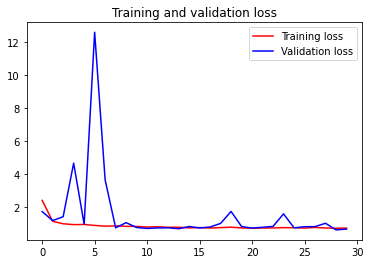

<Figure size 432x432 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure(figsize=(6,6))

In [ ]:
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_pred_classes

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
v_test=np.argmax(y_test,axis = 1)
v_test

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
confusion_matrix(v_test,Y_pred_classes )

array([[316,  34,  18],
       [ 29, 319,  39],
       [ 15,  24, 331]])

[[0.85869565 0.0923913  0.04891304]
 [0.0749354  0.82428941 0.10077519]
 [0.04054054 0.06486486 0.89459459]]


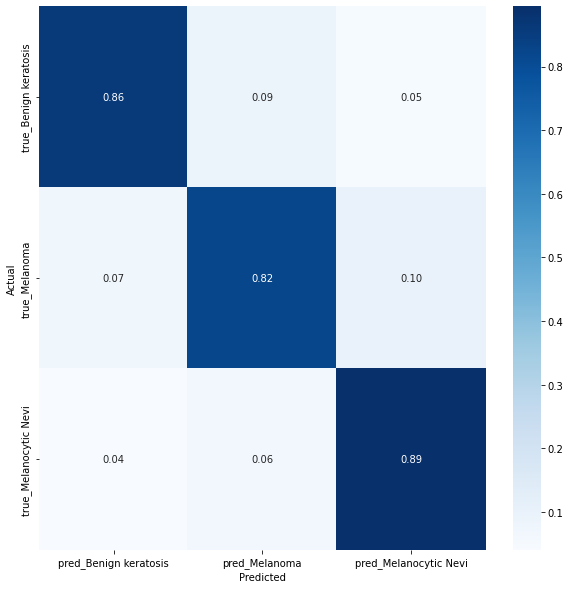

In [ ]:
class_names = ["Benign keratosis", "Melanoma",'Melanocytic Nevi']
def plot_confusion_matrix(y_test, y_pred):
  cmn = confusion_matrix(y_test, y_pred)
  # Normalise
  cmn = cmn.astype('float') / cmn.sum(axis=1)[:, np.newaxis]
  # print it
  print(cmn)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(cmn, annot=True, fmt='.2f', 
              xticklabels=[f"pred_{c}" for c in class_names], 
              yticklabels=[f"true_{c}" for c in class_names],
              cmap="Blues"
              )
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()
plot_confusion_matrix(v_test,Y_pred_classes)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(v_test,Y_pred_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(v_test,Y_pred_classes,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(v_test,Y_pred_classes,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(v_test,Y_pred_classes,average='weighted')
print('F1 score: %f' % f1)
 

Accuracy: 0.858667
Precision: 0.858781
Recall: 0.858667
F1 score: 0.858478


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

array([2, 0, 1, ..., 2, 2, 2])